In [1]:
dataset_directory = '../dataset'
validation_directory = dataset_directory + '/validation'
train_directory = dataset_directory + '/train'

In [5]:
from keras.utils import image_dataset_from_directory

image_size = (256, 256)

train_dataset = image_dataset_from_directory(
    train_directory,
    label_mode = 'categorical',
    image_size = image_size,
    batch_size = 16,
    shuffle = True
)

validation_dataset = image_dataset_from_directory(
    validation_directory,
    label_mode = 'categorical',
    image_size = image_size,
    batch_size = 16,
    shuffle = True
)

Found 9423 files belonging to 3 classes.
Found 2353 files belonging to 3 classes.


In [15]:
from keras.models import Sequential
from keras.layers import InputLayer, Rescaling, RandomFlip, RandomRotation, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.initializers import he_normal

model = Sequential(
    [

        InputLayer(input_shape=image_size + (3,)),
        Rescaling(1./255),

        RandomFlip('horizontal_and_vertical'),
        RandomRotation(factor=0.4, fill_mode='wrap'),

        Conv2D(32, (3, 3), padding = 'same', kernel_initializer=he_normal(), activation='elu'),
        BatchNormalization(),        
        Conv2D(32, (3, 3), padding = 'same', kernel_initializer=he_normal(), activation='elu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        Conv2D(32, (3, 3), padding = 'same', kernel_initializer=he_normal(), activation='elu'),
        BatchNormalization(),        
        Conv2D(32, (3, 3), padding = 'same', kernel_initializer=he_normal(), activation='elu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(32, (3, 3), padding = 'same', kernel_initializer=he_normal(), activation='elu'),
        BatchNormalization(),     
        Conv2D(32, (3, 3), padding = 'same', kernel_initializer=he_normal(), activation='elu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        Conv2D(32, (3, 3), padding = 'same', kernel_initializer=he_normal(), activation='elu'),
        BatchNormalization(),    
        Conv2D(32, (3, 3), padding = 'same', kernel_initializer=he_normal(), activation='elu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Flatten(),

        Dense(64, activation='elu', kernel_initializer=he_normal()),
        BatchNormalization(),
        Dropout(0.2),

        Dense(64, activation='elu', kernel_initializer=he_normal()),
        BatchNormalization(),
        Dropout(0.2),

        Dense(3, activation='softmax')
    ]
)

In [16]:
from keras.optimizers import Adam

model.compile (
    optimizer = Adam(),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

In [17]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath = '../models/my-model.keras',
    monitor ='val_categorical_accuracy',
    verbose = True,
    save_best_only = True,
    save_weights_only=False,
    mode = 'max'
)

In [ ]:
history = model.fit(
    train_dataset,
    epochs = 30,
    validation_data = validation_dataset,
    callbacks = [checkpoint]
)

In [ ]:
from keras.models import load_model
model = load_model('../models/my-model.keras')

1/1 [==============================] - 1s 609ms/step


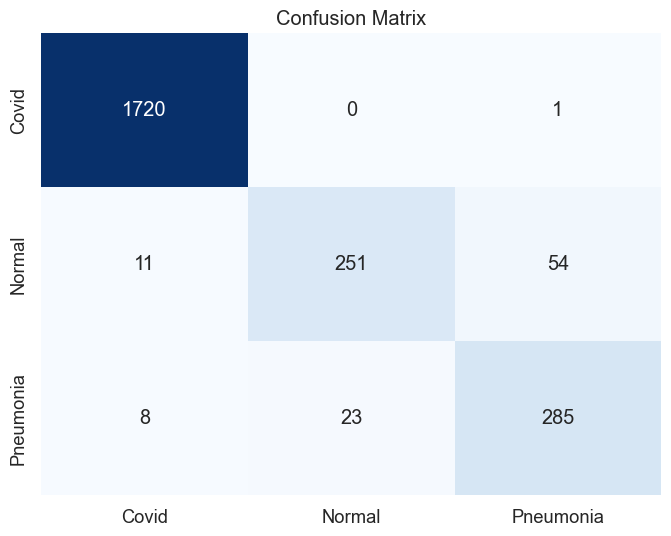

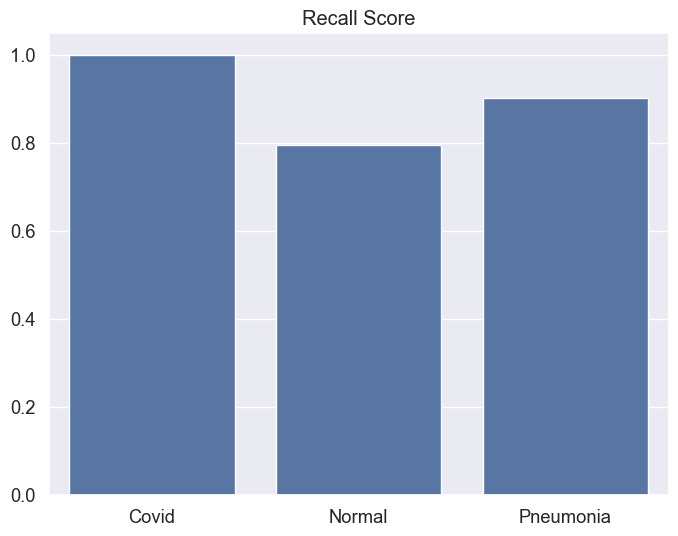

Covid: 0.9994
Normal: 0.7943
Pneumonia: 0.9019


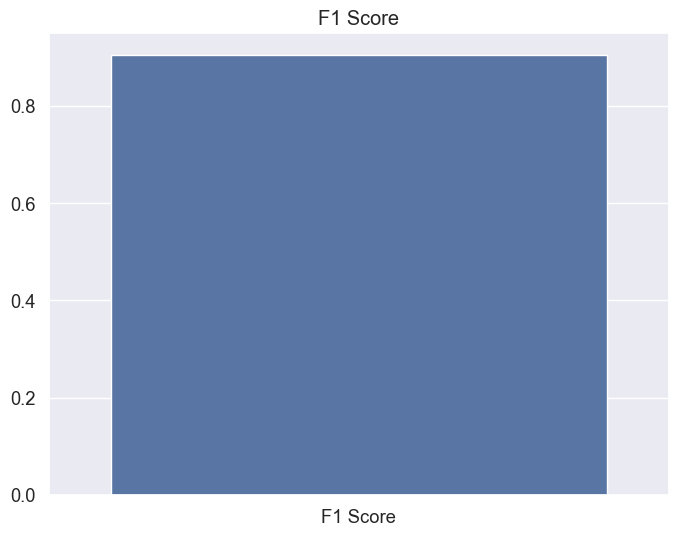

F1-Score: 0.9047


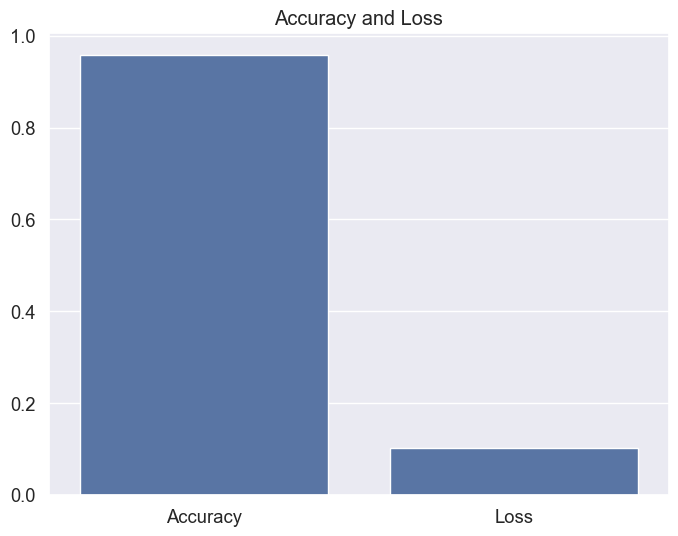

Accuracy: 0.9588 | Loss: 0.1029


In [6]:
from utils.evaluate_model import evaluate_model
evaluate_model(model, validation_dataset)